In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
sns.set_style('darkgrid')

In [3]:
X = np.load('./dataset_fixed/X.npy')
Y = np.load('./dataset_fixed/Y.npy')

In [4]:
X

array([[[0.47450978, 0.46274507, 0.45098037, ..., 0.50196075,
         0.5137255 , 0.52549016],
        [0.46666664, 0.45098037, 0.43921566, ..., 0.4980392 ,
         0.5098039 , 0.52156866],
        [0.45490193, 0.43921566, 0.42745095, ..., 0.49411762,
         0.50196075, 0.517647  ],
        ...,
        [0.4470588 , 0.4352941 , 0.4235294 , ..., 0.49019605,
         0.4980392 , 0.5058824 ],
        [0.45490193, 0.44313723, 0.43137252, ..., 0.4980392 ,
         0.5058824 , 0.5137255 ],
        [0.46274507, 0.45098037, 0.43921566, ..., 0.50196075,
         0.5098039 , 0.52156866]],

       [[0.5372549 , 0.517647  , 0.5137255 , ..., 0.572549  ,
         0.5803921 , 0.5921569 ],
        [0.5294118 , 0.5137255 , 0.5098039 , ..., 0.56470585,
         0.5764706 , 0.58431375],
        [0.52549016, 0.5098039 , 0.50196075, ..., 0.5529412 ,
         0.56470585, 0.5764706 ],
        ...,
        [0.45490193, 0.44313723, 0.43137252, ..., 0.5686275 ,
         0.58431375, 0.5921569 ],
        [0.4

In [5]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [6]:
X.shape

(2062, 64, 64)

In [7]:
Y.shape

(2062, 10)

In [8]:
#converting y to single vector(argmax returns array of max value)
y = np.argmax(Y, axis=1)
y[0]

0

In [9]:
#Visualizing
def visualize_img(image,label):
    plt.title(label)
    plt.imshow(image, cmap='gray')

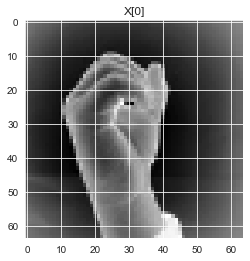

In [10]:
visualize_img(X[0], label='X[0]')

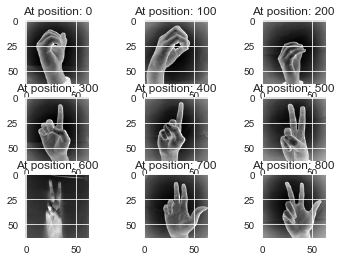

In [11]:
for i in range(9):
    plt.subplot(3,3,i+1)
    visualize_img(X[i*100], label="At position: " + str(i*100))

In [12]:
y[300]

1

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=1)

In [14]:
x_train.shape

(1443, 64, 64)

In [15]:
#Model
inputs = tf.keras.Input(shape=(64,64,1))

conv1 = tf.keras.layers.Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)
dropout1 = tf.keras.layers.Dropout(0.2)(pool1)

conv2 = tf.keras.layers.Conv2D(filters = 16, kernel_size=(5,5), activation = 'relu')(dropout1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)
dropout2 = tf.keras.layers.Dropout(0.2)(pool2)
#Added Dropouts because model was overfitting the data initially, performance improved.

flatten = tf.keras.layers.Flatten()(dropout2)

dense1 = tf.keras.layers.Dense(units =120, activation = 'relu')(flatten)
dense2 = tf.keras.layers.Dense(units =84, activation = 'relu' )(dense1)

outputs = tf.keras.layers.Dense(units = 10, activation='softmax')(dense2)

model = tf.keras.Model(inputs = inputs, outputs = outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 60, 60, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 30, 30, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 16)        0     

In [16]:
#train
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(x_train, y_train, validation_split = 0.2, batch_size = 32, epochs = 100)

Epoch 1/100
37/37 [==============================] - 4s 94ms/step - loss: 2.2647 - accuracy: 0.1658 - val_loss: 1.8578 - val_accuracy: 0.3564
Epoch 2/100
37/37 [==============================] - 2s 45ms/step - loss: 1.6028 - accuracy: 0.4587 - val_loss: 1.3257 - val_accuracy: 0.5121
Epoch 3/100
37/37 [==============================] - 2s 45ms/step - loss: 1.0454 - accuracy: 0.6382 - val_loss: 1.0344 - val_accuracy: 0.6540
Epoch 4/100
37/37 [==============================] - 2s 45ms/step - loss: 0.8002 - accuracy: 0.7073 - val_loss: 0.8329 - val_accuracy: 0.7336
Epoch 5/100
37/37 [==============================] - 2s 44ms/step - loss: 0.5525 - accuracy: 0.8298 - val_loss: 0.8500 - val_accuracy: 0.7405
Epoch 6/100
37/37 [==============================] - 2s 45ms/step - loss: 0.5558 - accuracy: 0.8104 - val_loss: 0.7049 - val_accuracy: 0.7924
Epoch 7/100
37/37 [==============================] - 2s 44ms/step - loss: 0.3993 - accuracy: 0.8786 - val_loss: 0.6545 - val_accuracy: 0.8166
Epoch 

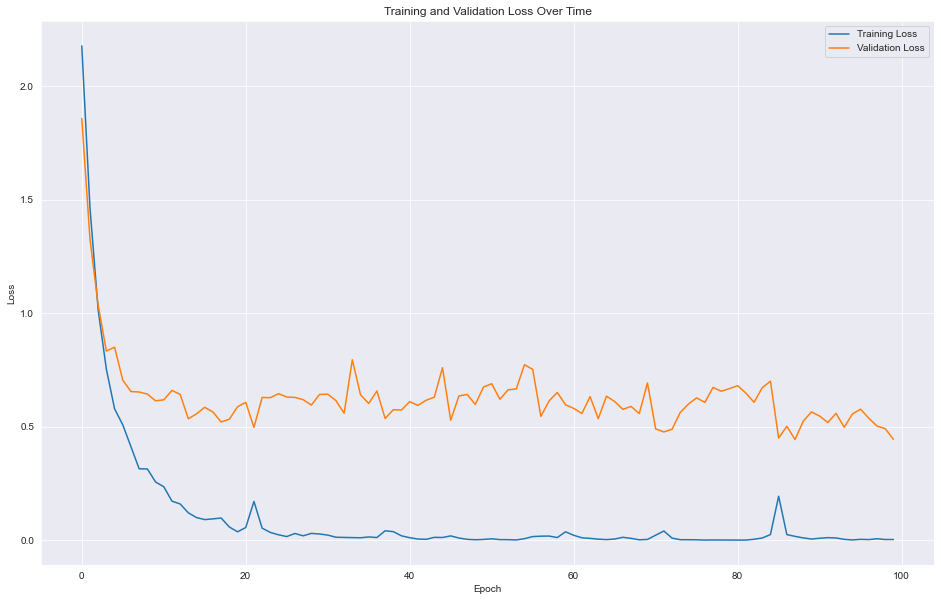

In [18]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range, history.history['loss'], label="Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

In [19]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Test Loss: 0.29185
Test Accuracy: 93.54%


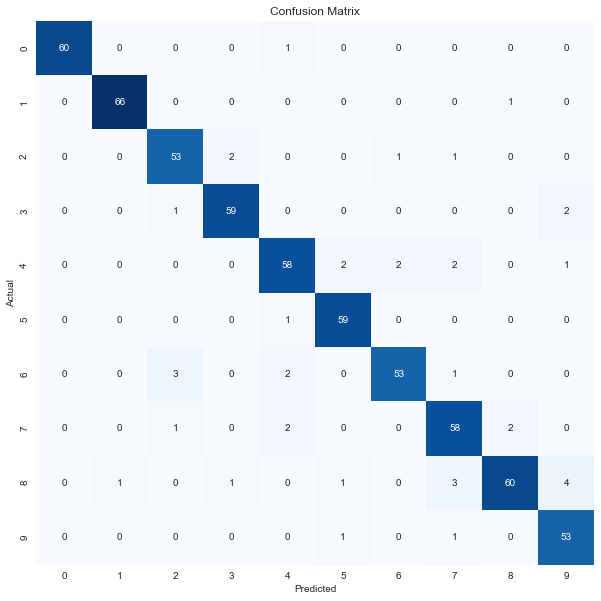

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.99      0.99      0.99        67
           2       0.91      0.93      0.92        57
           3       0.95      0.95      0.95        62
           4       0.91      0.89      0.90        65
           5       0.94      0.98      0.96        60
           6       0.95      0.90      0.92        59
           7       0.88      0.92      0.90        63
           8       0.95      0.86      0.90        70
           9       0.88      0.96      0.92        55

    accuracy                           0.94       619
   macro avg       0.94      0.94      0.94       619
weighted avg       0.94      0.94      0.94       619



In [20]:
evaluate_model(model, x_test, y_test)